File created by Jinghao Chen (jinghc2@uci.edu).

Import necessary packages.

In [1]:
import pickle
import torch
import mptools as mp
import numpy as np
np.random.seed(114514)

Load combined data from repository "/data".

In [2]:
pickle_in = open("data/data_comb.pkl","rb")
data_comb = pickle.load(pickle_in)

Calculate necessary values.

In [3]:
N_comb = data_comb.shape[1]

In [4]:
N_theta = 4+N_comb-1 # the number of unknown parameters

Initialize $\theta$.

In [5]:
theta_ini = np.array([0.5,0.06,0.5,-3.26]+[0]*(N_comb-1)).reshape(N_theta,1) # + 0.1*np.random.randn(N_theta,1)

Shuffle and binary classified data.

In [6]:
X, Y = data_comb[:,:-1], data_comb[:,-1]   # get features & target
X, Y = mp.shuffleData(X,Y)       # reorder randomly rather than by class label

In [7]:
Xtr, Ytr = X[Y!=5,:], Y[Y!=5]
Ytr = np.heaviside(Ytr-5,-1)

Train the classifier to jointly learn $\theta$.

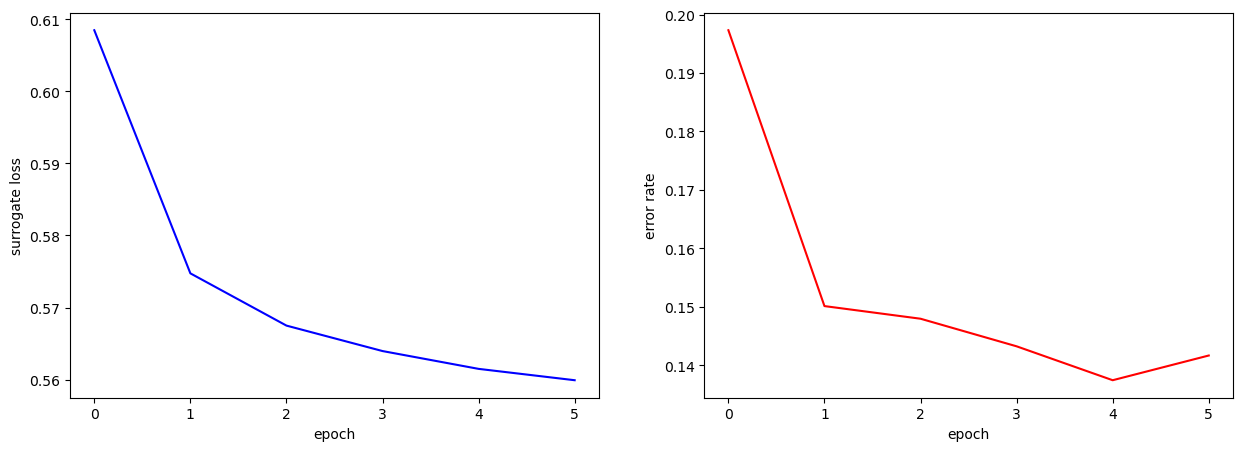

KeyboardInterrupt: 

In [8]:
learner = mp.jointClassifier()
learner.classes = np.unique(Ytr)
learner.theta = torch.tensor(theta_ini,requires_grad = True,dtype=torch.float32)
learner.train(Xtr,Ytr,initStep=1e-1,stopTol=1e-4,stopEpochs=10,alpha=10);

In [163]:
theta = learner.theta.detach().numpy()

In [157]:
X, Y = data_comb[:,:-1], data_comb[:,-1]   # get features & target

In [158]:
N1 = 104
R = 1.98e-3 # gas const
T = 310 # temperature at which cells were induced
RT = R*T

In [159]:
X1 = X[:,:N1] # X1 is a CRP sequence
X2 = X[:,N1:] # X2 is a RNAP sequence

In [160]:
eps_c = X1 @ theta[4:4+N1]; # CRP binding energy
eps_r = X2 @ theta[4+N1:]; # RNAP binding energy
wi = theta[2]*(np.exp(-eps_r/RT)+theta[1]*np.exp(-(eps_c+eps_r+theta[3])/RT))
tau = wi/(1+theta[1]*np.exp(-eps_c/RT)+wi)

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [148]:
g = [str(int(y)) for y in Y]

In [149]:
g = np.array(g)

In [150]:
g = g.reshape(tau.shape)

In [151]:
x = np.array(tau.T.tolist()[0])

In [152]:
g = np.array(g.T.tolist()[0])

In [154]:
df = pd.DataFrame(dict(x=x, g=g))

/home/jchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/jchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/jchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/jchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/jchen/

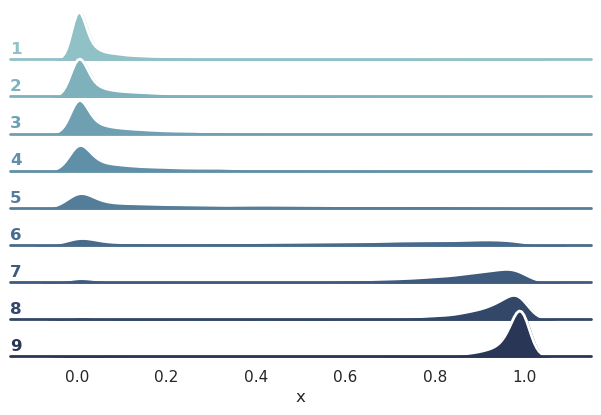

In [155]:


# Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
# df = pd.DataFrame(dict(x=x, g=g))
# m = df.g.map(ord)
# df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

/home/jchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/jchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/jchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/jchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/jchen/

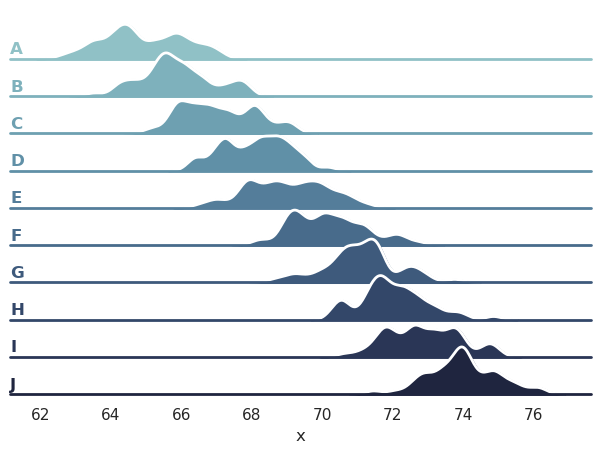

In [29]:


# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

First 4 values are reference and maximal transcription rates in ratio $\frac{\bar{\tau}}{\tau_{max}}$, concentration of CRP $C_c$, concentration of RNAP $C_r$ and CRP-RNAP interaction energy $\varepsilon_i$.

In [ ]:
theta_np = learner.theta.detach().numpy()
theta_np[:4] # value after 50 epochs

Save it if needed.

In [ ]:
# pickle_out = open("data/theta230731joint272param.pkl","wb")
# pickle.dump(theta_np, pickle_out)
# pickle_out.close()

Plot the energy matrix for CRP, display energy shift and unit.

In [ ]:
theta_c,_,shift_c,scale_c = mp.energyMatrix(theta_np[4:4+104],plot = True)

In [ ]:
shift_c, scale_c

Now we turn to RNAP.

In [ ]:
theta_r,_,shift_r,scale_r = mp.energyMatrix(theta_np[4+104:],plot = True)

In [ ]:
shift_r, scale_r